<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Práctica 5. Métodos de diferenciación numérica </h2> 

---
### Alumno: Pérez Trejo Brandon Eliud
---

#### **1. Diferenciación numérica.** Crea una función $f(x)$ que devuelva $1+\frac{1}{2}\tanh{(2x)}$, luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2\leq x\leq 2$.

#### Después, calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: usa la función _tanh_ del paquete _math_)

In [1]:
# Importo las librerías y funciones que voy a usar 
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib.pylab import imshow

In [2]:
# Defino la función que quiero derivar
def f1(x):
    return (1 + (1/2)*mt.tanh(2*x))

Text(0, 0.5, 'Eje y')

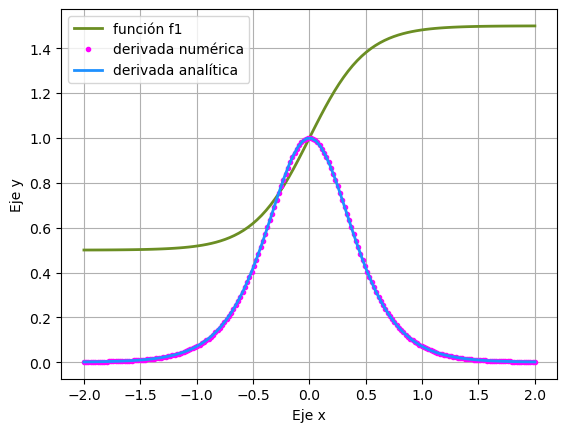

In [63]:
# La siguiente función toma una función, un intervalo y un elemento infinitesimal h, y regresa una lista con dos listas
# -estas dos listas corresponden al dominio e imagen de la función derivada.

def dcentral(f,a,b,h):
    intervalo = np.linspace(a,b,200)
    # Formalmente, la derivada de f en un punto x está dada por la siguiente función. Sin embargo, como quería hacer la gráfica -
    # -de la derivada, definí una función más grande que regresa puntos de la función derivada ("dcentral").
    def diferencial(x): 
        return (( f(x + (h/2)) - f(x - (h/2)) )/h )
    df = list(map(diferencial,intervalo)) # Definir "diferencial" dentro de "dcentral" permite usar map pues ya no depende de f y del punto x
    puntos = [intervalo,df] # Lo que quiero que me devuelva la función son los puntos del dominio y esos mismos puntos evaludados
                            # -algo similar a lo que hace la paquetería "np.polynomial.legendre.legauss"
    return puntos

# La derivada (o los puntos de la función derivada) los obtengo al aplicar la función anterior a f1(x)
derivada = dcentral(f1,-2,2,0.001)

#  Por otro lado, grafico también la función que estoy derivando. Para eso, defino una muestra de puntos x en el intervalo [-2,2]
dominio = np.linspace(-2,2,100)
codominio = list(map(f1,dominio))

# Con las dos últimas listas ya puedo graficar f1, y con la lista derivada, pues su derivada.
plt.plot(dominio,codominio, label='función f1',color='olivedrab',lw=2)
plt.plot(derivada[0],derivada[1],'.', label='derivada numérica', color='magenta')

# La derivada analítica de la función f1 es :
def real(x):
    return (1/(mt.cosh(2*x)**2))

# Grafico también la derivada analítica
plt.plot(dominio,list(map(real,dominio)),label='derivada analítica', color='dodgerblue',lw=2)

# POr último, agrego algunas cosas que estilicen la gráfica como nombres, etiquetas y un cuadrícula
plt.grid()
plt.xlabel('Eje x')
plt.legend()
plt.ylabel('Eje y')

#### **2. Campo eléctrico de una distribución de cargas.** Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiante.

#### Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi = q/4\pi \epsilon _0 r$ y el campo eléctrico es $\vec{E}=-\nabla \phi$.

#### **(a)** Suponiendo que tienes dos cargas, de $+1\ C$ y $-1\ C$ (respectivamente), separadas $10\ cm$. Calcula el potencial eléctrico resultante en un plano cuadrado de $1\ m \times 1\ m$ que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a $1\ cm$ en una cuadrícula y haz una visualización en la pantalla del potencial usando un gráfico de densidad.

In [128]:
q0 = -1 # coulomb
q1 = 1 # coulomb
epsilon0 = 8.85e-12 # C^2/(Nm^2)

def V0(x,y):
    r = np.sqrt( ((x+0.05)**2) + (y**2) )
    return q0/(4*np.pi*epsilon0*r)
    
def V1(x,y):
    r = np.sqrt( ((x-0.05)**2) + (y**2) )
    return q1/(4*np.pi*epsilon0*r)

ladox = np.linspace(-0.5,0.5,500)
ladoy = np.linspace(-0.5,0.5,500)


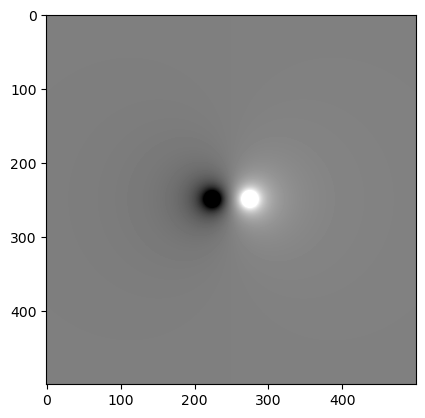

In [153]:
xv,yv = np.meshgrid(ladox,ladoy)
potencial = V0(xv,yv) + V1(xv,yv)

imshow(potencial,cmap='gray', aspect='equal', vmin=-3e11,vmax=3e11)

In [85]:
imshow?


Signature:
imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs,
) -> 'AxesImage'
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the colormapping using the parameters
``cmap='gray', vmin=0, 

#### **(b)** Ahora calcula las derivadas parciales del potencial con respecto a $x$ e $y$, para encontrar el campo eléctrico en el plano $xy$ y realiza una visualización de dicho campo.

#### **(c)** Ahora supongamos que tenemos una distribución continua de carg sobre un cuadrado de $L \times L$. La densidad de carga en $\frac{C}{m^2}$ es:

$$
    \sigma (x,y) = q_0 \sin{ \frac{2\pi x}{L} } \sin{ \frac{2\pi y}{L} }
$$

#### Calcula y visualiza el campo eléctrico resultante en puntos espaciados a $1\ cm$ en $1$ metro cuadrado del plano $xy$ para el caso donde $L=10\ cm$. La distribución de carga está centrada en el medio del área visualizada y $q_0 = 100\frac{C}{m^2}$.

#### Tendrás que realizar una integral doble sobre $x$ e $y$, luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.

#### **3. Procesamiento de imágenes y SMT.**

#### **(b)**

#### **(c)**